##TODO:


outliers isolation

graphs (3.g. scatterplot matrix)

correlation matrix


correlations w/out outliers


operations btwn cols


group continuous features (e.g. price range)

In [221]:
from base_data_handler import BaseDataHandler
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [222]:
file_path = "Cars Datasets 2025.csv"
handler = BaseDataHandler(file_path, encoding='latin-1')

## Dataframe:

In [223]:
handler.print_dataframe()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


## Describe:

In [224]:
handler.df.describe()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
count,1218,1218,1218,1215,1218,1218,1212,1218,1218,1218,1217
unique,37,1201,356,311,456,114,180,535,23,19,263
top,Nissan,Polo BlueMotion,I4,1984 cc,355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,149,2,64,31,23,145,45,36,871,692,72


## Null Handle:

In [225]:
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [226]:
handler.df.dropna(inplace=True)
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1210 non-null   object
 1   Cars Names                 1210 non-null   object
 2   Engines                    1210 non-null   object
 3   CC/Battery Capacity        1210 non-null   object
 4   HorsePower                 1210 non-null   object
 5   Total Speed                1210 non-null   object
 6   Performance(0 - 100 )KM/H  1210 non-null   object
 7   Cars Prices                1210 non-null   object
 8   Fuel Types                 1210 non-null   object
 9   Seats                      1210 non-null   object
 10  Torque                     1210 non-null   object
dtypes: object(11)
memory usage: 113.4+ KB


In [227]:
s, clean_df = handler.try_clean_column_names()

# Data Cleaning
## Fuel Types normalization as strings: stripping and sorting

In [228]:
#visualization
group_df = clean_df.groupby("fuel_types").count()
group_df.head(200)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,seats,torque
fuel_types,,,,,,,,,,
CNG/Petrol,1,1,1,1,1,1,1,1,1,1
Diesel,102,102,102,102,102,102,102,102,102,102
Diesel/Petrol,4,4,4,4,4,4,4,4,4,4
Electric,95,95,95,95,95,95,95,95,95,95
Gas / Hybrid,1,1,1,1,1,1,1,1,1,1
Hybrid,79,79,79,79,79,79,79,79,79,79
Hybrid (Gas + Electric),1,1,1,1,1,1,1,1,1,1
Hybrid (Petrol),4,4,4,4,4,4,4,4,4,4
Hybrid / Plug-in,1,1,1,1,1,1,1,1,1,1


In [229]:
col = "fuel_types"

clean_df = handler.df.copy()
clean_df[col] = (
    handler.df[col]
    .astype(str)              # ensure strings
    .str.strip()              # remove leading/trailing whitespace
    .str.replace(r"\s+", " ", regex=True)  # normalize multiple spaces
    .str.title()              # consistent capitalization
)


clean_df[col] = clean_df[col] = (
    clean_df[col]
    .astype(str)
    .str.replace(r"[\/\(\)]", ",", regex=True)  # replace / ( ) with commas
)

clean_df[col] = clean_df[col].str.replace(r"\s+", " ", regex=True).str.strip()


clean_df[col] = (
    clean_df[col]
    .str.split(",")
    .apply(lambda parts: ", ".join(sorted([p.strip().title() for p in parts if p.strip()])))
)
'''
mask = clean_df[col].str.contains("Gas", case=False, na=False)
clean_df = clean_df[~mask]
mask = clean_df[col].str.contains("Plug", case=False, na=False)
clean_df = clean_df[~mask]
'''
#visualization
group_df = clean_df.groupby(col).count()
group_df.head(200)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,seats,torque
fuel_types,,,,,,,,,,
"Awd, Petrol",2,2,2,2,2,2,2,2,2,2
"Cng, Petrol",1,1,1,1,1,1,1,1,1,1
Diesel,102,102,102,102,102,102,102,102,102,102
"Diesel, Petrol",23,23,23,23,23,23,23,23,23,23
Electric,95,95,95,95,95,95,95,95,95,95
"Electric, Hybrid",1,1,1,1,1,1,1,1,1,1
"Ev, Petrol",1,1,1,1,1,1,1,1,1,1
"Gas + Electric, Hybrid",1,1,1,1,1,1,1,1,1,1
"Gas, Hybrid",1,1,1,1,1,1,1,1,1,1


## Cleaning and striping Company Names

In [230]:
col = "company_names"

clean_df = clean_df.copy()
clean_df[col] = (
    clean_df[col]
    .astype(str)              # ensure strings
    .str.strip()              # remove leading/trailing whitespace
    .str.replace(r"\s+", " ", regex=True)  # normalize multiple spaces
    .str.title()              # consistent capitalization
)

group_df = clean_df.groupby(col).count()
group_df.head(200)


,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
company_names,,,,,,,,,,
Acura,27,27,27,27,27,27,27,27,27,27
Aston Martin,11,11,11,11,11,11,11,11,11,11
Audi,21,21,21,21,21,21,21,21,21,21
Bentley,1,1,1,1,1,1,1,1,1,1
Bmw,41,41,41,41,41,41,41,41,41,41
Bugatti,10,10,10,10,10,10,10,10,10,10
Cadillac,20,20,20,20,20,20,20,20,20,20
Chevrolet,58,58,58,58,58,58,58,58,58,58
Ferrari,9,9,9,9,9,9,9,9,9,9


## Cleaning cars_prices column

In [231]:
col = "cars_prices"

group_df = clean_df.groupby(col).count()
group_df.head(1500)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,fuel_types,seats,torque
cars_prices,,,,,,,,,,
"$1,000,000",1,1,1,1,1,1,1,1,1,1
"$1,100,000",4,4,4,4,4,4,4,4,4,4
"$1,300,000",1,1,1,1,1,1,1,1,1,1
"$1,700,000",1,1,1,1,1,1,1,1,1,1
"$10,000",2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
"$98,000",1,1,1,1,1,1,1,1,1,1
"$98,300",2,2,2,2,2,2,2,2,2,2
"$98,490",1,1,1,1,1,1,1,1,1,1


In [232]:
handler.try_init_df(clean_df)
handler.try_clean_string_to_number_col(col)

clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.sort_values(ascending=True, by=col).head(1500)


,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,fuel_types,seats,torque
cars_prices,,,,,,,,,,
4000.0,1,1,1,1,1,1,1,1,1,1
5000.0,1,1,1,1,1,1,1,1,1,1
6200.0,1,1,1,1,1,1,1,1,1,1
6500.0,1,1,1,1,1,1,1,1,1,1
7000.0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
5000000.0,1,1,1,1,1,1,1,1,1,1
5800000.0,1,1,1,1,1,1,1,1,1,1
6000000.0,1,1,1,1,1,1,1,1,1,1


## Cleaning seats column

In [233]:
col = "seats"
handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.sort_values(ascending=True, by=col).head(20)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,torque
seats,,,,,,,,,,
1.0,3,3,3,3,3,3,3,3,3,3
2.0,136,136,136,136,136,136,136,136,136,136
3.0,14,14,14,14,14,14,14,14,14,14
4.0,163,163,163,163,163,163,163,163,163,163
4.5,1,1,1,1,1,1,1,1,1,1
5.0,691,691,691,691,691,691,691,691,691,691
5.5,1,1,1,1,1,1,1,1,1,1
6.0,20,20,20,20,20,20,20,20,20,20
7.0,148,148,148,148,148,148,148,148,148,148


## Dropping engines column, as 350 uniques entries

In [234]:
clean_df["engines"].nunique()

350

In [235]:
clean_df = clean_df.drop(columns=['engines'])
clean_df.head()

,company_names,cars_names,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
0,Ferrari,SF90 STRADALE,3990 cc,963 hp,340 km/h,2.5 sec,1100000.0,Plug In Hyrbrid,2.0,800 Nm
1,Rolls Royce,PHANTOM,6749 cc,563 hp,250 km/h,5.3 sec,460000.0,Petrol,5.0,900 Nm
2,Ford,KA+,"1,200 cc",70-85 hp,165 km/h,10.5 sec,13500.0,Petrol,5.0,100 - 140 Nm
3,Mercedes,GT 63 S,"3,982 cc",630 hp,250 km/h,3.2 sec,161000.0,Petrol,4.0,900 Nm
4,Audi,AUDI R8 Gt,"5,204 cc",602 hp,320 km/h,3.6 sec,253290.0,Petrol,2.0,560 Nm


## Cleaning total_speed

In [236]:
col = "total_speed"

group_df = clean_df.groupby(col).count()
group_df.head(200)

,company_names,cars_names,cc_battery_capacity,horsepower,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
total_speed,,,,,,,,,
100 km/h,1,1,1,1,1,1,1,1,1
105 km/h,1,1,1,1,1,1,1,1,1
110 km/h,4,4,4,4,4,4,4,4,4
120 km/h,11,11,11,11,11,11,11,11,11
125 km/h,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
490 km/h,1,1,1,1,1,1,1,1,1
500 km/h,1,1,1,1,1,1,1,1,1
80 km/h,1,1,1,1,1,1,1,1,1


In [237]:
col = "total_speed"

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(200)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
total_speed,,,,,,,,,,
80.0,1,1,1,1,1,1,1,1,1,1
85.0,1,1,1,1,1,1,1,1,1,1
90.0,1,1,1,1,1,1,1,1,1,1
100.0,1,1,1,1,1,1,1,1,1,1
105.0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
380.0,2,2,2,2,2,2,2,2,2,2
402.0,2,2,2,2,2,2,2,2,2,2
420.0,5,5,5,5,5,5,5,5,5,5


In [238]:
handler.df = clean_df.copy()

In [239]:
clean_df.head(50)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
0,Ferrari,SF90 STRADALE,V8,3990 cc,963 hp,340.0,2.5 sec,1100000.0,Plug In Hyrbrid,2.0,800 Nm
1,Rolls Royce,PHANTOM,V12,6749 cc,563 hp,250.0,5.3 sec,460000.0,Petrol,5.0,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165.0,10.5 sec,13500.0,Petrol,5.0,100 - 140 Nm
3,Mercedes,GT 63 S,V8,"3,982 cc",630 hp,250.0,3.2 sec,161000.0,Petrol,4.0,900 Nm
4,Audi,AUDI R8 Gt,V10,"5,204 cc",602 hp,320.0,3.6 sec,253290.0,Petrol,2.0,560 Nm
5,Bmw,Mclaren 720s,V8,"3,994 cc",710 hp,341.0,2.9 sec,499000.0,Petrol,2.0,770 Nm
6,Aston Martin,VANTAGE F1,V8,"3,982 cc",656 hp,314.0,3.6 sec,193440.0,Petrol,2.0,685 Nm
7,Bentley,Continental GT Azure,V8,"3,996 cc",550 hp,318.0,4.0 sec,311000.0,Petrol,4.0,900 Nm
8,Lamborghini,VENENO ROADSTER,V12,"6,498 cc",750 hp,356.0,2.9 sec,4500000.0,Petrol,2.0,690 Nm
9,Ferrari,F8 TRIBUTO,V8,"3,900 cc",710 hp,340.0,2.9 sec,280000.0,Petrol,2.0,770 Nm


## cleaning cc_battery_capacity column

In [240]:
col = "cc_battery_capacity"

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(1500)

,company_names,cars_names,engines,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
cc_battery_capacity,,,,,,,,,,
-15.00,1,1,1,1,1,1,1,1,1,1
1.24,1,1,1,1,1,1,1,1,1,1
1.56,1,1,1,1,1,1,1,1,1,1
11.40,2,2,2,2,2,2,2,2,2,2
11.60,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
7700.00,1,1,1,1,1,1,1,1,1,1
7993.00,10,10,10,10,10,10,10,10,10,10
12800.00,4,4,4,4,4,4,4,4,4,4


## Cleaning horsepower column

In [241]:
col = "horsepower"

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(1500)

,company_names,cars_names,engines,cc_battery_capacity,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
horsepower,,,,,,,,,,
-95.0,1,1,1,1,1,1,1,1,1,1
-7.5,1,1,1,1,1,1,1,1,1,1
26.0,1,1,1,1,1,1,1,1,1,1
37.0,1,1,1,1,1,1,1,1,1,1
47.0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1160.0,1,1,1,1,1,1,1,1,1,1
1288.0,1,1,1,1,1,1,1,1,1,1
1500.0,6,6,6,6,6,6,6,6,6,6


## Cleaning torque column

In [242]:
col = "torque"

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(1500)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats
torque,,,,,,,,,,
-45.0,1,1,1,1,1,1,1,1,1,1
-43.5,1,1,1,1,1,1,1,1,1,1
45.0,1,1,1,1,1,1,1,1,1,1
51.0,1,1,1,1,1,1,1,1,1,1
60.0,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...
2500.0,2,2,2,2,2,2,2,2,2,2
2600.0,1,1,1,1,1,1,1,1,1,1
3500.0,1,1,1,1,1,1,1,1,1,1


## Cleaning performance_0_100_km_h column

In [243]:
col = "performance_0_100_km_h"

group_df = clean_df.groupby(col).count()
group_df.head(10)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,cars_prices,fuel_types,seats,torque
performance_0_100_km_h,,,,,,,,,,
6.1 sec,1,1,1,1,1,1,1,1,1,1
1.9 sec,1,1,1,1,1,1,1,1,1,1
10 sec,2,2,2,2,2,2,2,2,2,2
10. 5 sec,1,1,1,1,1,1,1,1,1,1
10.0 sec,19,19,19,19,19,19,19,19,19,19
10.1 sec,1,1,1,1,1,1,1,1,1,1
10.2 sec,14,14,14,14,14,14,14,14,14,14
10.3 sec,5,5,5,5,5,5,5,5,5,5
10.4 sec,3,3,3,3,3,3,3,3,3,3


In [244]:
col = "performance"
handler.try_rename_col(col="performance_0_100_km_h", name=col)

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(10)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,cars_prices,fuel_types,seats,torque
performance,,,,,,,,,,
1.9,1,1,1,1,1,1,1,1,1,1
2.1,1,1,1,1,1,1,1,1,1,1
2.2,1,1,1,1,1,1,1,1,1,1
2.3,1,1,1,1,1,1,1,1,1,1
2.4,5,5,5,5,5,5,5,5,5,5
2.5,8,8,8,8,8,8,8,8,8,8
2.6,2,2,2,2,2,2,2,2,2,2
2.7,2,2,2,2,2,2,2,2,2,2
2.8,12,12,12,12,12,12,12,12,12,12


In [245]:
handler.df = clean_df.copy()

# Isolate Outliers
## IQR Filtering

In [246]:
# 1. Calcolo dei Quartili
Q1 = handler.df['cars_prices'].quantile(0.25)
Q3 = handler.df['cars_prices'].quantile(0.75)
IQR = Q3 - Q1

# 2. Definizione dei limiti
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

print(f"Intervallo 'Normale' per prezzi: da {lower_bound:.2f} a {upper_bound:.2f}")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")

# 3. Individuazione degli Outlier
outliers_iqr = handler.df[(handler.df['cars_prices'] < lower_bound) | (handler.df['cars_prices'] > upper_bound)]
print(f"Numero di Outlier rilevati con IQR: {len(outliers_iqr)}")
print(f"Percentuale sul totale: {len(outliers_iqr)/len(handler.df)*100:.2f}%")

# Vediamo alcuni di questi outlier estremi
print("\nEsempi di outlier estremi:")
print(outliers_iqr['cars_prices'].sort_values(ascending=False).head(5))

Intervallo 'Normale' per prezzi: da -35000.00 a 133000.00
Q1: 28000.00, Q3: 70000.00, IQR: 42000.00
Numero di Outlier rilevati con IQR: 148
Percentuale sul totale: 12.23%

Esempi di outlier estremi:
887     18000000.0
886      9000000.0
1212     6000000.0
885      5800000.0
889      5000000.0
Name: cars_prices, dtype: float64


# Percentile filtering

In [247]:
# 1. Choose percentile thresholds
lower_percentile = 0.01   # 1st percentile
upper_percentile = 0.90   # 90th percentile

# 2. Compute bounds
lower_bound = handler.df['cars_prices'].quantile(lower_percentile)
upper_bound = handler.df['cars_prices'].quantile(upper_percentile)

print(f"Intervallo 'Normale' per prezzi (percentile filtering): da {lower_bound:.2f} a {upper_bound:.2f}")

# 3. Filter outliers
outliers_percentile = handler.df[
    (handler.df['cars_prices'] < lower_bound) | (handler.df['cars_prices'] > upper_bound)
]

print(f"Numero di Outlier rilevati con percentile filtering: {len(outliers_percentile)}")
print(f"Percentuale sul totale: {len(outliers_percentile)/len(handler.df)*100:.2f}%")

# 4. Show some extreme examples
print("\nEsempi di outlier estremi (percentile filtering):")
print(outliers_percentile['cars_prices'].sort_values(ascending=False).head(20))

Intervallo 'Normale' per prezzi (percentile filtering): da 9218.00 a 175020.00
Numero di Outlier rilevati con percentile filtering: 134
Percentuale sul totale: 11.07%

Esempi di outlier estremi (percentile filtering):
887     18000000.0
886      9000000.0
1212     6000000.0
885      5800000.0
889      5000000.0
8        4500000.0
888      4500000.0
882      3500000.0
881      3300000.0
883      3300000.0
884      3300000.0
32       3200000.0
880      3000000.0
42       2800000.0
13       1700000.0
41       1300000.0
416      1100000.0
40       1100000.0
33       1100000.0
0        1100000.0
Name: cars_prices, dtype: float64


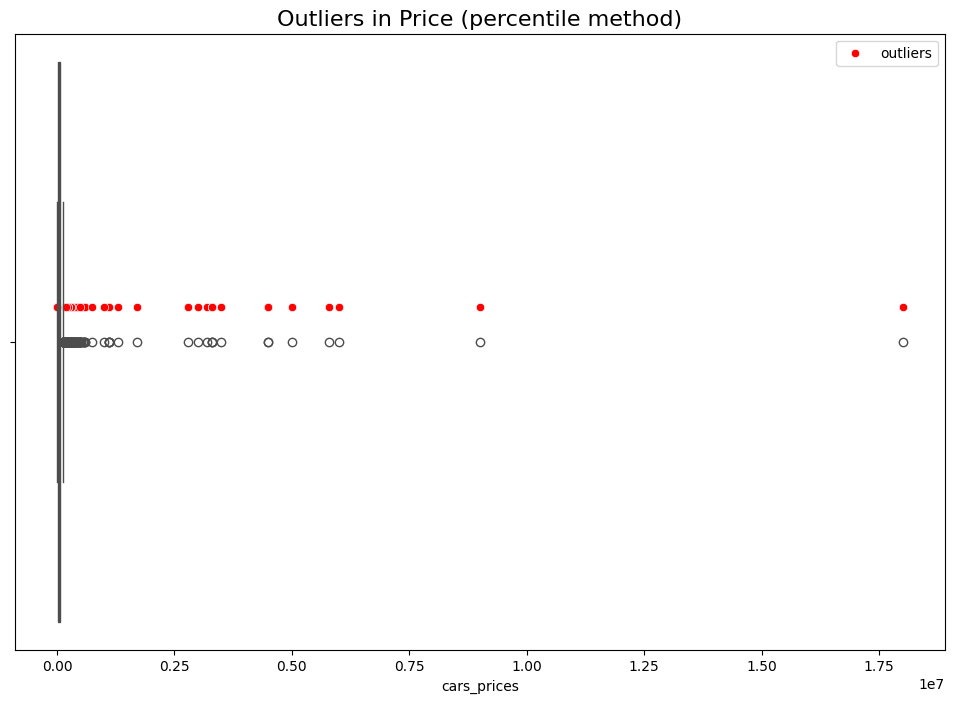

In [248]:
outlier_flags = handler.detect_outliers_all(method="percentile", lower_percentile=0.01, upper_percentile=0.90)

# Make the figure 2x larger (default is ~6x4, so use 12x8)
plt.figure(figsize=(12, 8))

# Full boxplot of all prices
sns.boxplot(x=handler.df["cars_prices"], color="aqua")

# Overlay the outliers in red
mask = outlier_flags["cars_prices"]
sns.scatterplot(
    x=handler.df["cars_prices"][mask],
    y=[-0.05]*mask.sum(),   # small jitter so they appear above the box
    color="red",
    marker="o",
    label="outliers"
)

plt.title("Outliers in Price (percentile method)", fontsize=16)
plt.legend()
plt.show()
